## A Simple Linear Impact Model with No Risk-Aversion

Price Dynamics: $P_{t+1}=P_t−\alpha N_t + \epsilon_t$ where $\alpha \in \mathbb{R}_{\geq 0}$

Utility function $U(\cdot)$ is the identity function, i.e., no Risk-Aversion

MDP Discount factor $\gamma=1$

Q_value for the first day is= 151.20000000000002
Optimal shares to sell everyday: [54, 0, 0, 0, 0, 0]
Q_value for the first day is= 2484.1236864288785
Optimal shares to sell everyday: [22, 18, 8, 8, 4, 0]
Q_value for the first day is= 2555.2742859028112
Optimal shares to sell everyday: [16, 14, 14, 8, 8, 0]
Q_value for the first day is= 2635.5891947129153
Optimal shares to sell everyday: [17, 12, 12, 10, 9, 0]
Q_value for the first day is= 2632.2919364125923
Optimal shares to sell everyday: [13, 12, 10, 11, 14, 0]
Q_value for the first day is= 2629.4136446729167
Optimal shares to sell everyday: [12, 16, 10, 14, 8, 0]
Q_value for the first day is= 2604.6628121232634
Optimal shares to sell everyday: [13, 17, 12, 11, 7, 0]
Q_value for the first day is= 2636.2232857613176
Optimal shares to sell everyday: [14, 12, 7, 12, 15, 0]
Q_value for the first day is= 2640.2348493327804
Optimal shares to sell everyday: [12, 12, 12, 11, 13, 0]
Q_value for the first day is= 2625.4247933684655
Optimal sh

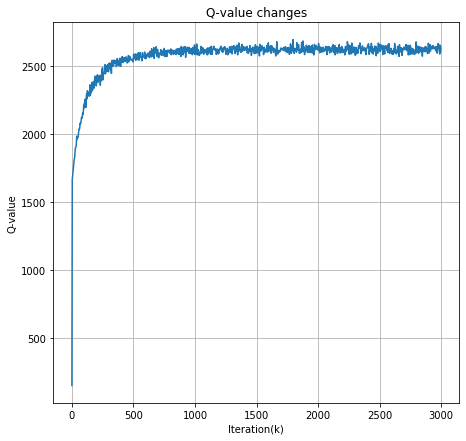

In [3]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

class TradeExecution():
    def __init__(self):
        self.iteration = 3000000
        
        self.T_size = 6 # length of Time
        self.P_size = 100 # Size of Spread of Prices
        self.N_size = 60 # Total number of shares to sell
        self.Start_Price = 80 # Bid Price at Start
        self.gamma = 1
        self.alpha = 0.1 # Stepsize
        self.epsilon = 0.5
        
    def build_qv_fun_dict(self) :
        # i : t, j : P_t, k : R_t, l: N_t, l's value: U_t
        Q = {(i, j, k): {l : 0 for l in range(self.N_size+1)} for i in range(self.T_size)\
             for j in range(self.P_size) for k in range(self.N_size+1)\
             } 
        return Q
    
    def build_action_dict(self):
        A = {(i, j, k): random.randint(0, k+1) for i in range(self.T_size)\
             for j in range(self.P_size) for k in range(self.N_size+1)}
        return A
        
        
    def simulator(self, Rt, Pt, Nt) -> (float, float, float):
        alpha=1
        error=np.random.binomial(10, 0.5, size=None)-5
        Pt = int(Pt - alpha * Nt - error)
        if Pt < 0:
            Pt = 0
        Rt = Rt - Nt
        reward = Nt * (Pt)

        return Rt, Pt, reward
        
    
    
    def Episode(self, Q, A, epsilon, method="Q-learning"):
                 
        #Set s0 as the starting state
        t = 0
        Pt = self.Start_Price
        Rt = self.N_size
                 
        best_action=max(Q[(t, Pt, Rt)], key = Q[(t, Pt, Rt)].get)
            
        # Apply Epsilon-Greedy Strategy here 
        if random.uniform(0, 1)<epsilon:
            A[(t, Pt, Rt)]= random.randint(0, Rt+1)
        else:
            A[(t, Pt, Rt)]= best_action 
                
        while t<self.T_size-1 and Rt > 0:  
                
            Nt = A[(t, Pt, Rt)] # Sample action a_t from policy π(st)
                
            #Simulate and observe reward rt and next state st+1
            Rt_next, Pt_next, reward= self.simulator(Rt, Pt, Nt)
                            
            t_next=t+1
                
            best_action=max(Q[(t_next, Pt_next, Rt_next)], \
                                  key=Q[(t_next, Pt_next, Rt_next)].get)
            
            if method == "Q-learning":
                Qmax = Q[(t_next, Pt_next, Rt_next)][best_action]
                Qnow = Q[(t, Pt, Rt)][Nt]
                Q[(t, Pt, Rt)][Nt]=Qnow+self.alpha*(reward\
                             +self.gamma*Qmax-Qnow)
            if method == "Sarsa":
                Nt_next = A[(t_next, Pt_next, Rt_next)]
                Qnow = Q[(t, Pt, Rt)][Nt]
                Qnext = Q[(t_next, Pt_next, Rt_next)][Nt_next]
                Q[(t, Pt, Rt)][Nt] = Qnow+\
                        self.alpha*(reward+self.gamma*Qnext-Qnow)
                
            #update S
            t = t_next
            Pt = Pt_next
            Rt = Rt_next
                
            if random.uniform(0, 1)<epsilon:
                A[(t, Pt, Rt)] = random.randint(0, Rt+1)
            else:
                A[(t, Pt, Rt)] = best_action 
        
        return Q, A
                
        
    def Algorithm(self, method):
        Q = self.build_qv_fun_dict()
        A = self.build_action_dict()
        #epsilon = 0.15
        
        iteration = []
        Q_plot = []
 
        
        for i in range(self.iteration):
            
            epsilon=1-i/self.iteration
            
            Q, A = self.Episode(Q, A, epsilon, method)
            #print(Q)
            
            #Plotting 
            if i % (self.iteration/10) == 0:
                first_day_sell=max(Q[(0, self.Start_Price, self.N_size)], \
                    key=Q[(0, self.Start_Price, self.N_size)].get)
                print("Q_value for the first day is=", Q[(0, self.Start_Price, self.N_size)][first_day_sell])
    
                shares_sold_daily=[first_day_sell] 
                sell=first_day_sell
                remain=self.N_size-sell
                price=self.Start_Price-sell
                
                for j in range(1, self.T_size):
                    sell=max(Q[(j, price, remain)], \
                               key=Q[(j, price, remain)].get)
                    shares_sold_daily.append(sell)
                    remain=remain-sell
                    price=price-sell
                print("Optimal shares to sell everyday:", shares_sold_daily)
                
            if i % (self.iteration/1000)==0:
                
                iteration.append(i/1000)
                first_day_sell=max(Q[(0, self.Start_Price, self.N_size)], \
                        key=Q[(0, self.Start_Price, self.N_size)].get)
                Q_plot.append(Q[(0, self.Start_Price, self.N_size)][first_day_sell])
 
       
        plt.figure(figsize=(16,7))
        plt.subplot(121)
        plt.plot(iteration,Q_plot)
        plt.grid(True)
        plt.xlabel("Iteration(k)")
        plt.ylabel("Q-value")
        plt.title("Q-value changes")

        
        
obj = TradeExecution()
obj.Algorithm("Q-learning")

Q_value for the first day is= 154.0
Optimal shares to sell everyday: [55, 0, 0, 0, 0, 0]
Q_value for the first day is= 2162.448504901721
Optimal shares to sell everyday: [33, 15, 8, 4, 0, 0]
Q_value for the first day is= 2311.106191703756
Optimal shares to sell everyday: [22, 19, 10, 9, 0, 0]
Q_value for the first day is= 2326.0963568518946
Optimal shares to sell everyday: [28, 12, 11, 7, 2, 0]
Q_value for the first day is= 2342.993941524794
Optimal shares to sell everyday: [24, 15, 8, 10, 3, 0]
Q_value for the first day is= 2389.4957393710015
Optimal shares to sell everyday: [24, 13, 9, 7, 7, 0]
Q_value for the first day is= 2431.5418428080416
Optimal shares to sell everyday: [24, 10, 13, 9, 4, 0]
Q_value for the first day is= 2480.0062243620664
Optimal shares to sell everyday: [16, 14, 11, 10, 9, 0]
Q_value for the first day is= 2525.409710155
Optimal shares to sell everyday: [18, 13, 15, 8, 6, 0]
Q_value for the first day is= 2559.108866510121
Optimal shares to sell everyday: [20, 1

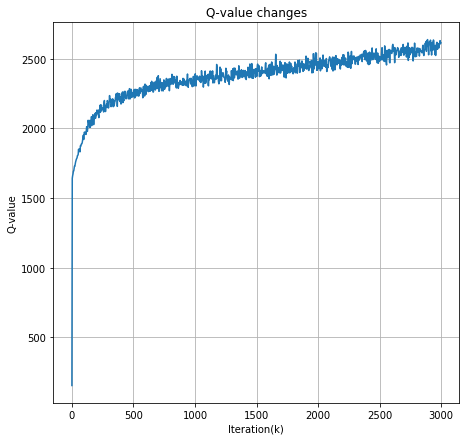

In [4]:
obj = TradeExecution()
obj.Algorithm("Sarsa")